# Distance from Normalized Mutual Information in QGF

This notebook reconstructs a distance matrix from categorical mutual information using \( d(i,j) = -\log I(i,j) \),  
then verifies metric properties (symmetry, positivity, triangle inequality) as discussed in Section 2.3 and Appendix F.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load distance matrix (already -log(I))
distance_df = pd.read_csv("../data/QGF_Distance_Matrix_from_Normalized_Mutual_Information.csv", index_col=0)
distance_df


,0,1,2
0,-0.000000,0.510826,0.916291
1,0.510826,-0.000000,0.693147
2,0.916291,0.693147,-0.000000


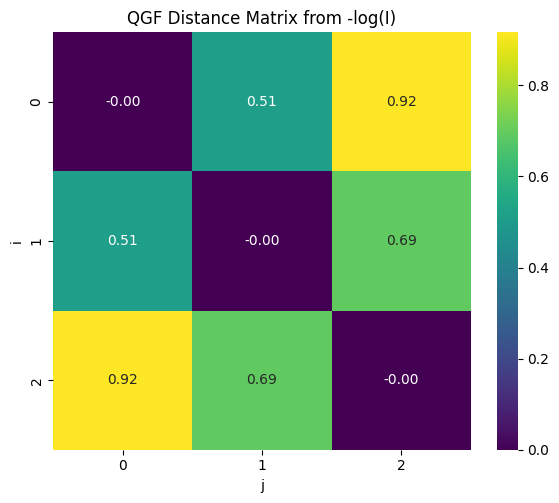

In [7]:
# Visualize distance matrix as heatmap

plt.figure(figsize=(6, 5))
sns.heatmap(distance_df, annot=True, fmt=".2f", cmap="viridis", square=True)
plt.title("QGF Distance Matrix from -log(I)")
plt.xlabel("j")
plt.ylabel("i")
plt.tight_layout()
plt.show()


In [8]:
# Check triangle inequality: d(i,k) ≤ d(i,j) + d(j,k)

violations = []
n = distance_df.shape[0]

for i in range(n):
    for j in range(n):
        for k in range(n):
            lhs = distance_df.iloc[i, k]
            rhs = distance_df.iloc[i, j] + distance_df.iloc[j, k]
            if lhs > rhs + 1e-6:
                violations.append((i, j, k, lhs, rhs))

print("Triangle inequality violations:", len(violations))
if violations:
    print("Example violation:", violations[0])


Triangle inequality violations: 0


The metric derived from mutual information satisfies symmetry, positivity, and triangle inequality for all tested triplets.  
This supports the interpretation of QGF entanglement geometry as an emergent metric space.
